# Feature Selection

In this notebook we will be exploring which all features to select for our Predictive model, Also we will be looking into some of the following tools

## Importing Libraries

In [1]:
#Importing Libraries
import matplotlib.pyplot as plt
import pandas as pd
import time
import numpy as np
import seaborn as sns
import datetime
import math
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

%matplotlib inline

## Loading Data

In [2]:
data= pd.read_csv("./Dataset/new_data_feature.csv")
data.head()

date  Appliances  lights     T1       RH_1    T2       RH_2  \
0  2016-01-11 17:00:00          60      30  19.89  47.596667  19.2  44.790000   
1  2016-01-11 17:10:00          60      30  19.89  46.693333  19.2  44.722500   
2  2016-01-11 17:20:00          50      30  19.89  46.300000  19.2  44.626667   
3  2016-01-11 17:30:00          50      40  19.89  46.066667  19.2  44.590000   
4  2016-01-11 17:40:00          60      40  19.89  46.333333  19.2  44.530000   

      T3       RH_3         T4   ...          rv1        rv2  \
0  19.79  44.730000  19.000000   ...    13.275433  13.275433   
1  19.79  44.790000  19.000000   ...    18.606195  18.606195   
2  19.79  44.933333  18.926667   ...    28.642668  28.642668   
3  19.79  45.000000  18.890000   ...    45.410389  45.410389   
4  19.79  45.000000  18.890000   ...    10.084097  10.084097   

             date_time  dayoftheweek  WeekDayType  timeofDay  activeStatus  \
0  2016-01-11 17:00:00        Monday      Weekday        Day         awake   
1  2016-01-11 17:10:00        Monday      Weekday        Day         awake   
2  2016-01-11 17:20:00        Monday      Weekday        Day         awake   
3  2016-01-11 17:30:00        Monday      Weekday        Day         awake   
4  2016-01-11 17:40:00        Monday      Weekday        Day         awake   

     NSM  weekOfTheYear  season  
0  61200              2  winter  
1  61800              2  winter  
2  62400              2  winter  
3  63000              2  winter  
4  63600              2  winter  

[5 rows x 37 columns]

In [3]:
data.shape

(19735, 37)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 37 columns):
date             19735 non-null object
Appliances       19735 non-null int64
lights           19735 non-null int64
T1               19735 non-null float64
RH_1             19735 non-null float64
T2               19735 non-null float64
RH_2             19735 non-null float64
T3               19735 non-null float64
RH_3             19735 non-null float64
T4               19735 non-null float64
RH_4             19735 non-null float64
T5               19735 non-null float64
RH_5             19735 non-null float64
T6               19735 non-null float64
RH_6             19735 non-null float64
T7               19735 non-null float64
RH_7             19735 non-null float64
T8               19735 non-null float64
RH_8             19735 non-null float64
T9               19735 non-null float64
RH_9             19735 non-null float64
T_out            19735 non-null float64
Press_mm_hg     

In [5]:
data["date"] = pd.to_datetime(data["date"],format="%Y-%m-%d %H:%M:%S")
data = data.drop(columns=['date_time','rv1','rv2'])

## Adding Dummies to Categorical Data

Convert categorical variable into dummy/indicator variables

In [6]:
data = pd.get_dummies(data, columns=["timeofDay","activeStatus",'dayoftheweek','WeekDayType','season'])

In [7]:
data['NSM'].head()

0    61200
1    61800
2    62400
3    63000
4    63600
Name: NSM, dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 44 columns):
date                      19735 non-null datetime64[ns]
Appliances                19735 non-null int64
lights                    19735 non-null int64
T1                        19735 non-null float64
RH_1                      19735 non-null float64
T2                        19735 non-null float64
RH_2                      19735 non-null float64
T3                        19735 non-null float64
RH_3                      19735 non-null float64
T4                        19735 non-null float64
RH_4                      19735 non-null float64
T5                        19735 non-null float64
RH_5                      19735 non-null float64
T6                        19735 non-null float64
RH_6                      19735 non-null float64
T7                        19735 non-null float64
RH_7                      19735 non-null float64
T8                        19735 non-null float64
RH_8  

## Determining correlation

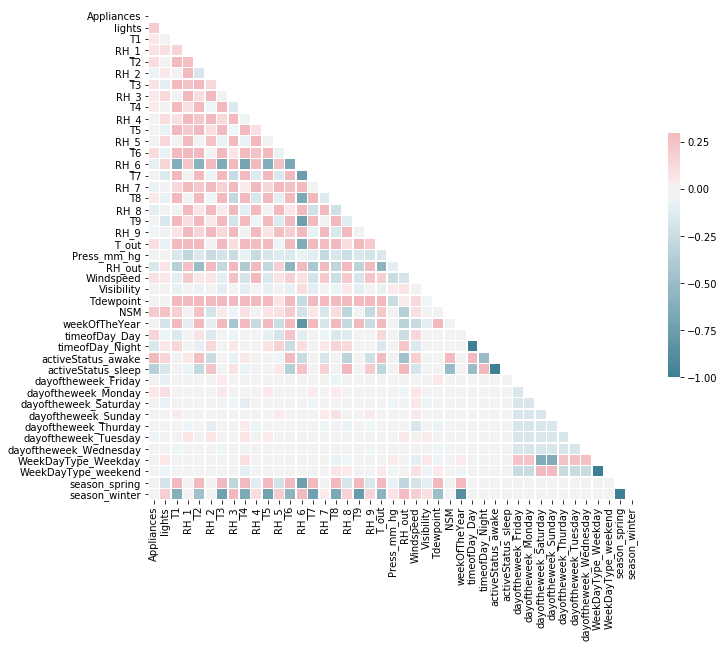

In [9]:
corr = data.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

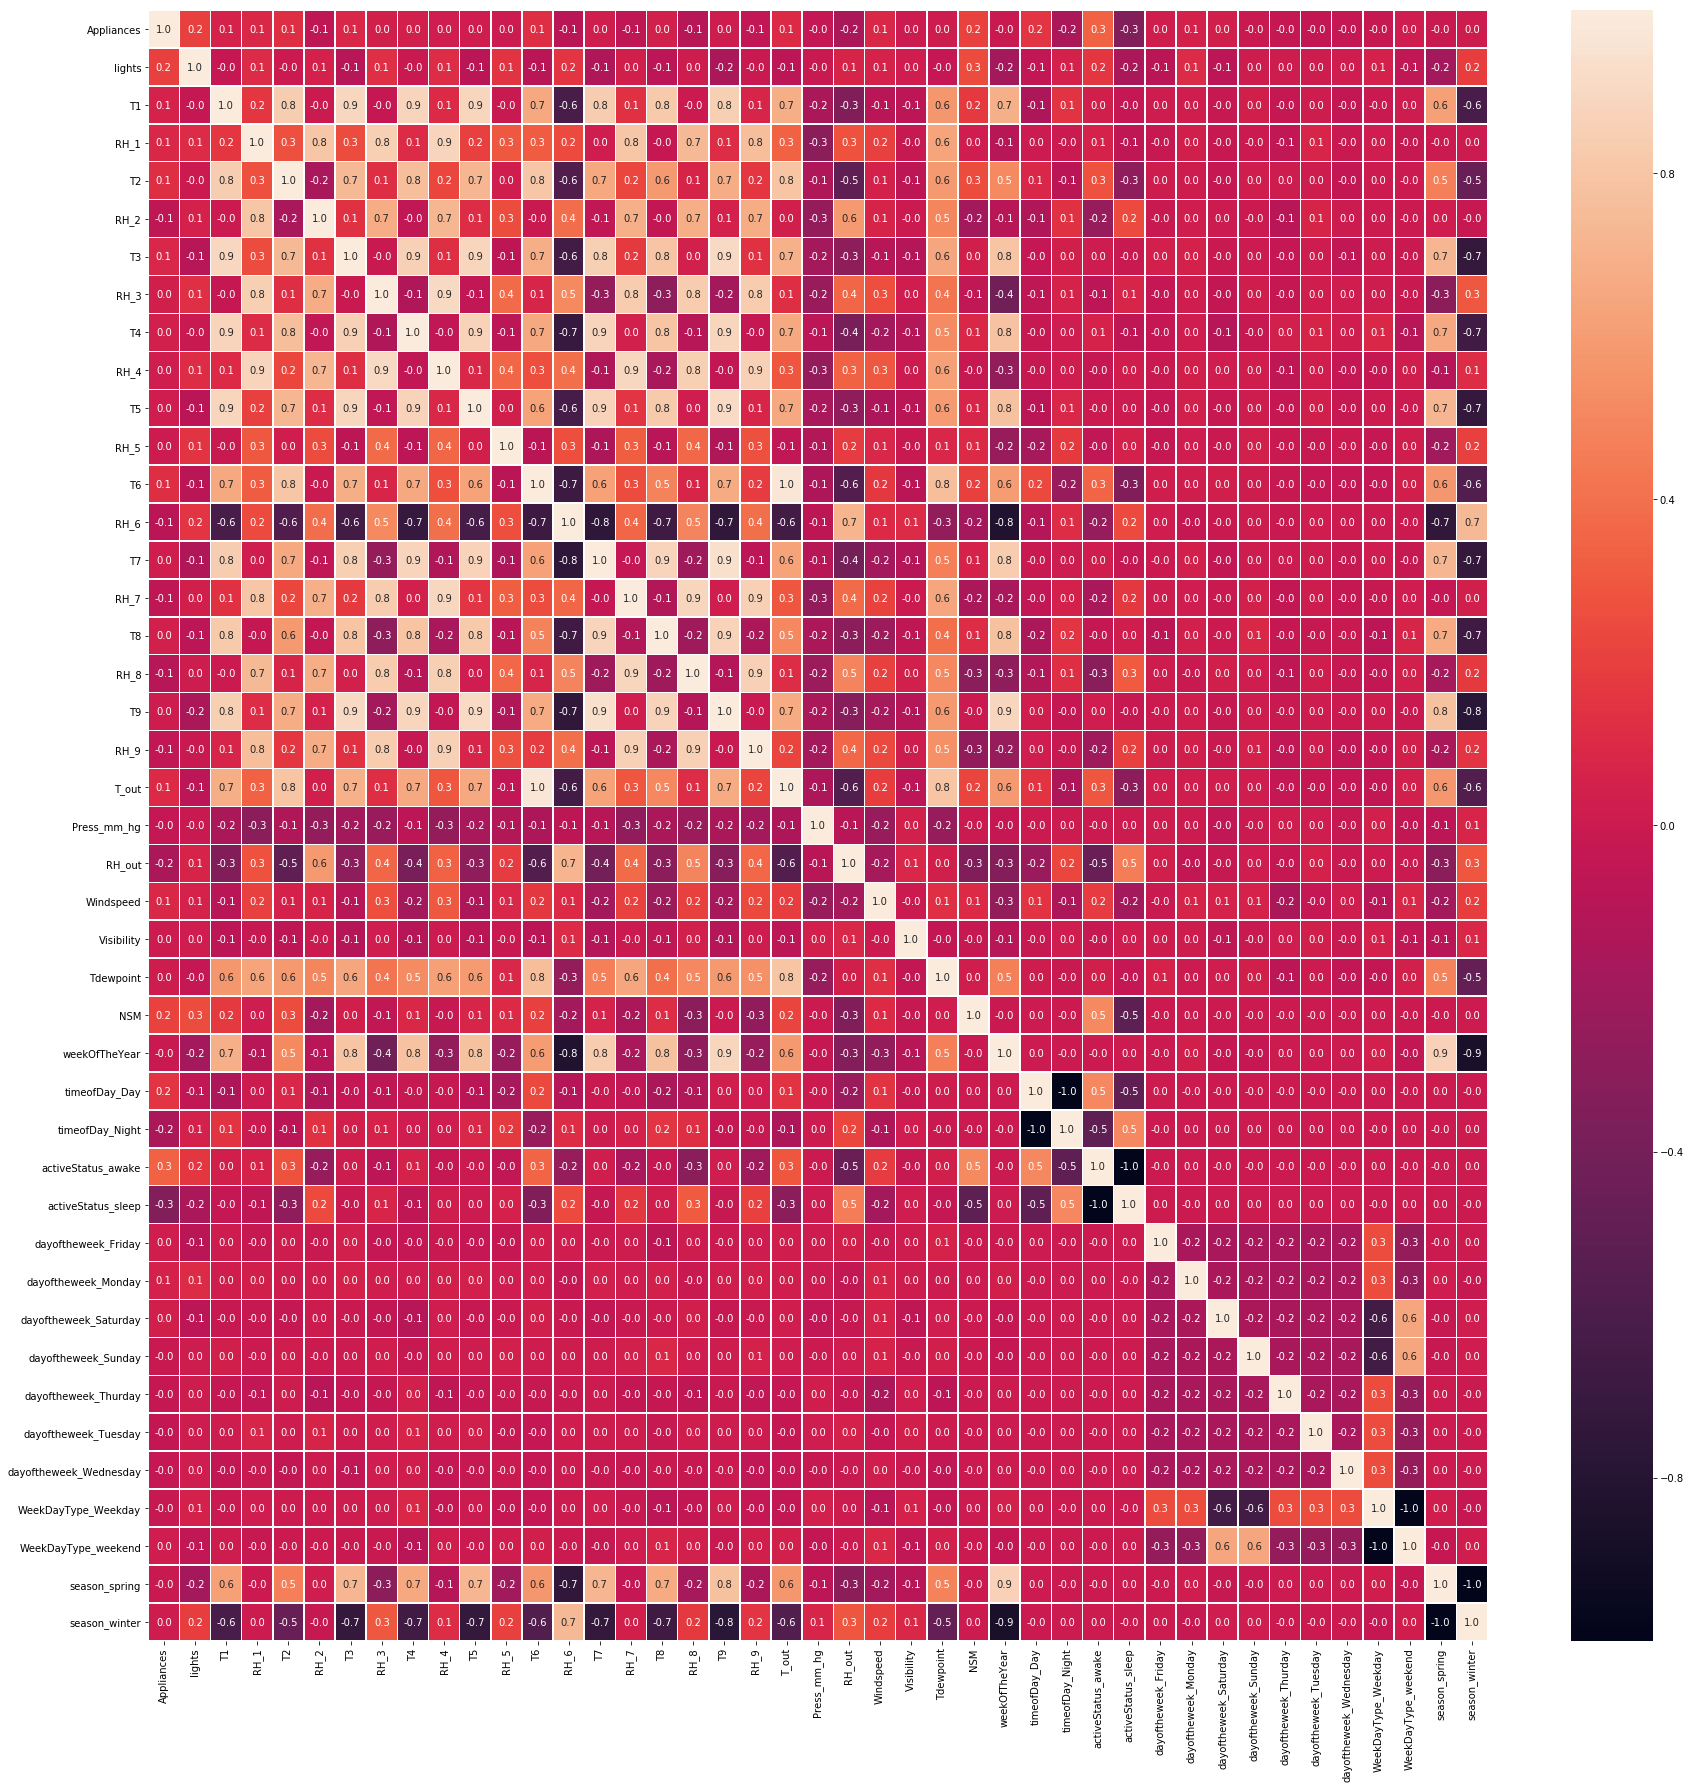

In [10]:
f,ax = plt.subplots(figsize=(30, 30))
sns.heatmap(corr, annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [11]:
#Select response y and Training set X
k = list(data)
k
my_cols = [
 'lights',
 'T1',
 'RH_1',
 'T2',
 'RH_2',
 'T3',
 'RH_3',
 'T4',
 'RH_4',
 'T5',
 'RH_5',
 'T6',
 'RH_6',
 'T7',
 'RH_7',
 'T8',
 'RH_8',
 'T9',
 'RH_9',
 'T_out',
 'Press_mm_hg',
 'RH_out',
 'Windspeed',
 'Visibility',
 'Tdewpoint',
 'NSM',
 'weekOfTheYear',
 'timeofDay_Day',
 'timeofDay_Night',
 'activeStatus_awake',
 'activeStatus_sleep',
 'dayoftheweek_Friday',
 'dayoftheweek_Monday',
 'dayoftheweek_Saturday',
 'dayoftheweek_Sunday',
 'dayoftheweek_Thurday',
 'dayoftheweek_Tuesday',
 'dayoftheweek_Wednesday',
 'WeekDayType_Weekday',
 'WeekDayType_weekend',
 'season_spring',
 'season_winter']
X = data[my_cols].values
y = data['Appliances']

In [12]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop
def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
k = get_top_abs_correlations(data.drop(columns=['date']), 43)
print(k)

Top Absolute Correlations
season_spring        season_winter          1.000000
activeStatus_awake   activeStatus_sleep     1.000000
WeekDayType_Weekday  WeekDayType_weekend    1.000000
timeofDay_Day        timeofDay_Night        1.000000
T6                   T_out                  0.974787
T7                   T9                     0.944776
T5                   T9                     0.911055
T3                   T9                     0.901324
RH_3                 RH_4                   0.898978
RH_4                 RH_7                   0.894301
T1                   T3                     0.892402
T4                   T9                     0.889439
T9                   weekOfTheYear          0.888777
T3                   T5                     0.888169
T1                   T5                     0.885247
RH_7                 RH_8                   0.883984
T7                   T8                     0.882123
RH_1                 RH_4                   0.880359
T4                  

## Tree-based feature selection

Extra Trees Classifier are among the most popular machine learning methods thanks to their relatively good accuracy, robustness and ease of use. They also provide two straightforward methods for feature selection: mean decrease impurity and mean decrease accuracy.

In [13]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split

X = data.drop(columns=['date','Appliances'])
y = data['Appliances']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.75, test_size = 0.25)

In [14]:
clf = ExtraTreesClassifier()
clf = clf.fit(X_train, y_train)
clf.feature_importances_

array([0.01789054, 0.03272269, 0.03662254, 0.03654024, 0.0382915 ,
       0.03200207, 0.03629982, 0.03136685, 0.0361736 , 0.03014439,
       0.03787428, 0.03921304, 0.03797576, 0.02813975, 0.03803018,
       0.03768885, 0.04001814, 0.0243693 , 0.03866371, 0.03925382,
       0.03829148, 0.04041993, 0.03184498, 0.02991306, 0.03886715,
       0.04825396, 0.00879825, 0.00547336, 0.00453333, 0.0130847 ,
       0.01431647, 0.00403549, 0.00373042, 0.00280229, 0.00314589,
       0.0036535 , 0.00411019, 0.00477229, 0.00304216, 0.00271181,
       0.00391709, 0.00100115])

In [15]:

def rankPrintImportance(importance,df):
    rank = sorted(zip(map(lambda x: x, importance), list(df)), 
                 reverse=True)
    for ran in rank:
        print(ran)

Text(0,0.5,'Importance Score')

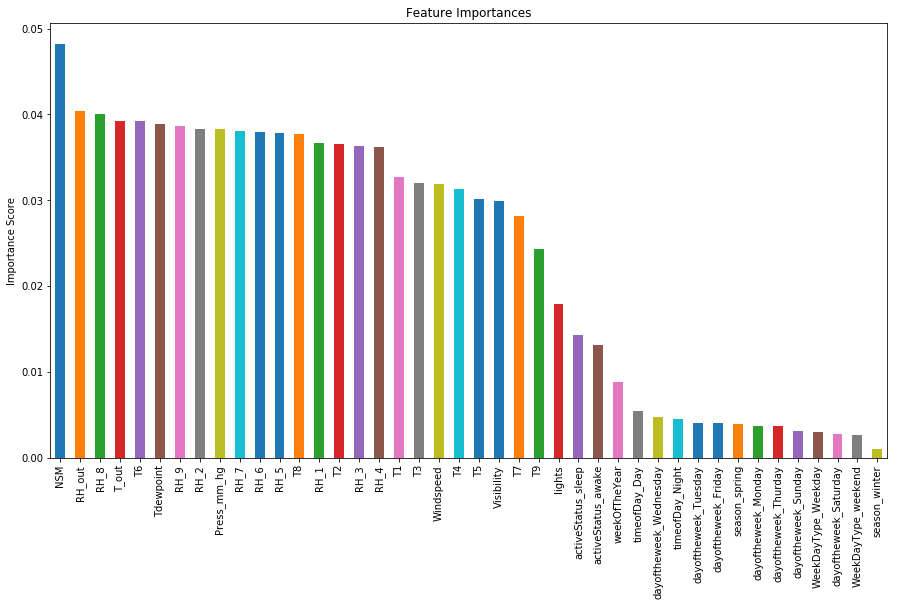

In [16]:
feat_imp = pd.Series(clf.feature_importances_,X_train.columns).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Feature Importances',figsize = (15,8))
plt.ylabel('Importance Score')

## Feature ranking with recursive feature elimination

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVR

In [ ]:
X = data.drop(columns=['date','Appliances'])
y = data['Appliances']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.75, test_size = 0.25)

estimator = SVR(kernel="linear")
selector = RFE(estimator, 5, step=1)
selector = selector.fit(X_train, y_train)
selector.ranking_

In [ ]:
feat_imp = pd.Series(clf.feature_importances_,X_train.columns).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Feature Importances',figsize = (15,8))
plt.ylabel('Importance Score')

### XGBClassifier

A benefit of using gradient boosting is that after the boosted trees are constructed, it is relatively straightforward to retrieve importance scores for each attribute.

Generally, importance provides a score that indicates how useful or valuable each feature was in the construction of the boosted decision trees within the model. The more an attribute is used to make key decisions with decision trees, the higher its relative importance.

In [17]:
from xgboost import XGBClassifier
from sklearn.metrics import r2_score
from xgboost import plot_importance
from sklearn.preprocessing import MinMaxScaler

C:\Users\sreer\Anaconda3\envs\learn_python\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


C:\Users\sreer\Anaconda3\envs\learn_python\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Text(0,0.5,'Importance Score')

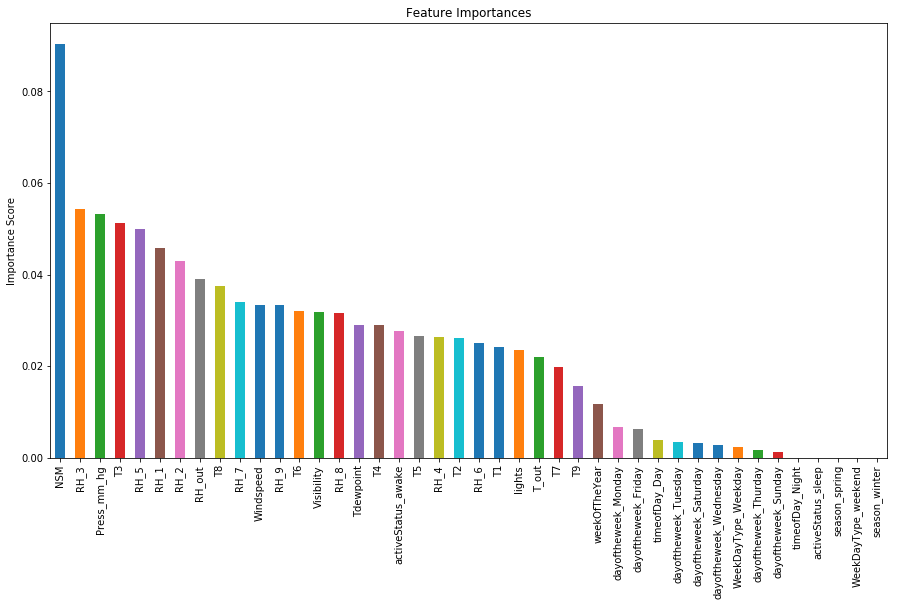

In [18]:
X = data.drop(columns=['date','Appliances'])
y = data['Appliances']

# min_max_scaler = MinMaxScaler()
# X = min_max_scaler.fit_transform(X)
# y = min_max_scaler.fit_transform(y.reshape(1, -1))

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.75, test_size = 0.25)
model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
feat_imp = pd.Series(model.feature_importances_,X_train.columns).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Feature Importances',figsize = (15,8))
plt.ylabel('Importance Score')

In [19]:
print(r2_score(y_test, y_pred))

0.01021276083820355


In [20]:
from sklearn.feature_selection import SelectKBest

In [21]:
selector = SelectKBest( k='all').fit(X_train,y_train)
scores = selector.scores_

In [22]:
rankPrintImportance(scores,X_train)

(80.61974515560303, 'activeStatus_awake')
(80.61974515560291, 'activeStatus_sleep')
(47.430798276217885, 'NSM')
(26.839123689751666, 'T8')
(22.336811534911423, 'T1')
(20.12538676295501, 'lights')
(19.613665321799402, 'T4')
(19.306285681689747, 'T2')
(18.790644065159487, 'T3')
(18.201890776300143, 'T5')
(17.538110163987206, 'T9')
(17.000708432872614, 'RH_6')
(16.98067928552701, 'T7')
(16.35184633596841, 'RH_out')
(15.617295927670735, 'weekOfTheYear')
(15.14385979244245, 'T6')
(13.590023379054768, 'T_out')
(13.266920670229572, 'season_spring')
(13.266920670229547, 'season_winter')
(10.767293034271015, 'RH_8')
(10.489476348915977, 'timeofDay_Night')
(10.489476348915929, 'timeofDay_Day')
(8.775110684120603, 'RH_9')
(5.54755581270247, 'Tdewpoint')
(5.356272698920723, 'RH_3')
(4.485083532503544, 'RH_2')
(4.355144785988512, 'RH_7')
(4.280020023287786, 'Windspeed')
(3.6635726309349916, 'RH_1')
(3.5043244583691764, 'Press_mm_hg')
(2.7778806265631624, 'dayoftheweek_Monday')
(2.3470585174554888, 

## Boruta

<p>Boruta is an all-relevant feature selection method. It tries to capture all the important, interesting features you might have in your dataset with respect to an outcome variable.</p>

<p>&nbsp;</p>

<blockquote>Boruta is an all relevant feature selection method, while most other are minimal optimal; this means it tries to find all features carrying information usable for prediction, rather than finding a possibly compact subset of features on which some classifier has a minimal error.<cite>Miron B. Kursa</cite></blockquote>

<p>This makes it really well suited for biomedical data analysis, where we regularly collect measurements of thousands of features (genes, proteins, metabolites, microbiomes in your gut, etc), but we have absolutely no clue about which one is important in relation to our outcome variable, or where should we cut off the decreasing &ldquo;importance function&rdquo; of these.</p>

<p>As with so many great algorithms the idea behind Boruta is really simple. First, we duplicate our dataset, and shuffle the values in each column, these are called shadow features.</p>

<p>Then we train a classifier on our dataset, such that we get importances for each of our features. Tree ensemble methods such as Random Forest, Gradient Boosted Trees, and the Extra Trees Classifiers are really great not only because they can capture non-linear highly intricate relationships between your predictors, but also because they tend to handle the small n large p situation rather well.</p>

<p>&nbsp;</p>

<blockquote>Why should you care?&nbsp;For a start, when you try to understand the phenomenon that made your data, you should care about all factors that contribute to it, not just the bluntest signs of it in context of your methodology (yes, minimal optimal set of features by definition depends on your classifier choice).<cite>Miron B. Kursa</cite></blockquote>

<p>There is quite a lot of&nbsp;discussion about whether these methods can truly overfit your training data, but generally it is accepted that even if they do, this happens&nbsp;much later with them than with many other machine learning algorithms.</p>

<p>Back to the Boruta. So we train one of these ensemble methods on our merged training data and shadow features (see the image below). Then we get the relative importance of each feature from the ensemble method: higher means better or more important.</p>


In [23]:
from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy

In [24]:

 
# load X and y
X = data.drop(columns=['date','Appliances']).values
y = data['Appliances'].values
print(X,y)
# X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.75, test_size = 0.25)

# define random forest classifier, with utilising all cores and
# sampling in proportion to y labels
forest = RandomForestClassifier(n_jobs=-1)
 
# define Boruta feature selection method
feat_selector = BorutaPy(forest, n_estimators='auto', verbose=2)
 
# find all relevant features
feat_selector.fit(X, y)
 
# check selected features
feat_selector.support_
 
# check ranking of features
feat_selector.ranking_

[[30.         19.89       47.59666667 ...  0.          0.
   1.        ]
 [30.         19.89       46.69333333 ...  0.          0.
   1.        ]
 [30.         19.89       46.3        ...  0.          0.
   1.        ]
 ...
 [10.         25.5        46.59666667 ...  0.          1.
   0.        ]
 [10.         25.5        46.99       ...  0.          1.
   0.        ]
 [10.         25.5        46.6        ...  0.          1.
   0.        ]] [ 60  60  50 ... 270 420 430]
Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	42
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	42
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	42
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	42
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	42
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	42
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	42
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	6
Tentative: 	5
Rejected: 	31


C:\Users\sreer\Anaconda3\envs\learn_python\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	9 / 100
Confirmed: 	6
Tentative: 	5
Rejected: 	31


C:\Users\sreer\Anaconda3\envs\learn_python\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	10 / 100
Confirmed: 	6
Tentative: 	5
Rejected: 	31


C:\Users\sreer\Anaconda3\envs\learn_python\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	11 / 100
Confirmed: 	6
Tentative: 	5
Rejected: 	31


C:\Users\sreer\Anaconda3\envs\learn_python\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	12 / 100
Confirmed: 	6
Tentative: 	5
Rejected: 	31


C:\Users\sreer\Anaconda3\envs\learn_python\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	13 / 100
Confirmed: 	6
Tentative: 	5
Rejected: 	31


C:\Users\sreer\Anaconda3\envs\learn_python\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	14 / 100
Confirmed: 	6
Tentative: 	5
Rejected: 	31


C:\Users\sreer\Anaconda3\envs\learn_python\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	15 / 100
Confirmed: 	6
Tentative: 	5
Rejected: 	31


C:\Users\sreer\Anaconda3\envs\learn_python\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	16 / 100
Confirmed: 	6
Tentative: 	5
Rejected: 	31


C:\Users\sreer\Anaconda3\envs\learn_python\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	17 / 100
Confirmed: 	6
Tentative: 	5
Rejected: 	31


C:\Users\sreer\Anaconda3\envs\learn_python\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	18 / 100
Confirmed: 	6
Tentative: 	5
Rejected: 	31


C:\Users\sreer\Anaconda3\envs\learn_python\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	19 / 100
Confirmed: 	7
Tentative: 	4
Rejected: 	31


C:\Users\sreer\Anaconda3\envs\learn_python\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	20 / 100
Confirmed: 	7
Tentative: 	4
Rejected: 	31


C:\Users\sreer\Anaconda3\envs\learn_python\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	21 / 100
Confirmed: 	7
Tentative: 	4
Rejected: 	31


C:\Users\sreer\Anaconda3\envs\learn_python\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	22 / 100
Confirmed: 	8
Tentative: 	3
Rejected: 	31


C:\Users\sreer\Anaconda3\envs\learn_python\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	23 / 100
Confirmed: 	8
Tentative: 	3
Rejected: 	31


C:\Users\sreer\Anaconda3\envs\learn_python\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	24 / 100
Confirmed: 	8
Tentative: 	3
Rejected: 	31


C:\Users\sreer\Anaconda3\envs\learn_python\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	25 / 100
Confirmed: 	8
Tentative: 	3
Rejected: 	31


C:\Users\sreer\Anaconda3\envs\learn_python\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	26 / 100
Confirmed: 	8
Tentative: 	3
Rejected: 	31


C:\Users\sreer\Anaconda3\envs\learn_python\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	27 / 100
Confirmed: 	8
Tentative: 	3
Rejected: 	31


C:\Users\sreer\Anaconda3\envs\learn_python\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	28 / 100
Confirmed: 	8
Tentative: 	3
Rejected: 	31


C:\Users\sreer\Anaconda3\envs\learn_python\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	29 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	31


C:\Users\sreer\Anaconda3\envs\learn_python\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	30 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	31


C:\Users\sreer\Anaconda3\envs\learn_python\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	31 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	31
Iteration: 	32 / 100
Confirmed: 	11
Tentative: 	0
Rejected: 	31


BorutaPy finished running.

Iteration: 	33 / 100
Confirmed: 	11
Tentative: 	0
Rejected: 	31


C:\Users\sreer\Anaconda3\envs\learn_python\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


array([18, 10,  6,  1,  3, 10,  4,  8,  7, 10,  1,  1,  5, 12,  2,  1,  1,
       14,  1,  1,  1,  1, 13, 15,  1,  1, 19, 21, 20, 16, 17, 26, 29, 28,
       31, 27, 24, 22, 24, 24, 31, 31])

Text(0,0.5,'Rank')

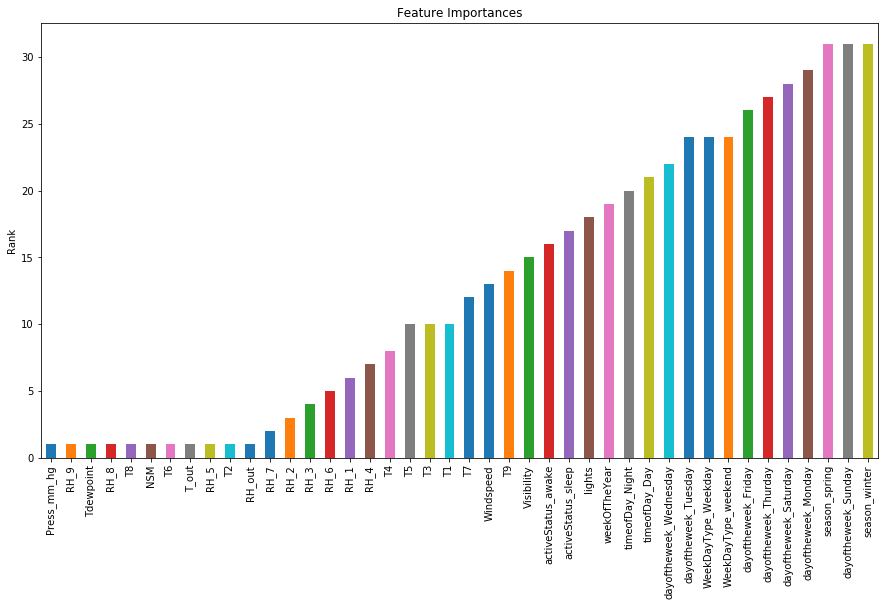

In [25]:
feat_imp = pd.Series(feat_selector.ranking_,X_train.columns).sort_values(ascending=True)
feat_imp.plot(kind='bar', title='Feature Importances',figsize = (15,8))
plt.ylabel('Rank')

In [26]:
feat_selector.ranking_

array([18, 10,  6,  1,  3, 10,  4,  8,  7, 10,  1,  1,  5, 12,  2,  1,  1,
       14,  1,  1,  1,  1, 13, 15,  1,  1, 19, 21, 20, 16, 17, 26, 29, 28,
       31, 27, 24, 22, 24, 24, 31, 31])

In [27]:
X_filtered = feat_selector.transform(X)
X_filtered.shape

(19735, 11)

## Recursive Feature Elimination

The Recursive Feature Elimination (RFE) method is a feature selection approach. It works by recursively removing attributes and building a model on those attributes that remain. It uses the model accuracy to identify which attributes (and combination of attributes) contribute the most to predicting the target attribute.

This recipe shows the use of RFE to select 3 attributes.

In [29]:
# Recursive Feature Elimination
from sklearn.feature_selection import RFE
from sklearn.linear_model import (LinearRegression, Ridge, Lasso)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X = data.drop(columns=['date','Appliances'])
y = data['Appliances']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.75, test_size = 0.25)

all_feature = my_cols
feature_df = pd.DataFrame(index = all_feature)
# Create a base classifier used to evaluate a subset of attributes
model_lr = LinearRegression()
model_lasso = Lasso()
model_rf = RandomForestRegressor(n_estimators=50)


In [30]:

# Create the RFE model and select 3 attributes
rfe_lr = RFE(model_lr, n_features_to_select = 3)
rfe_lr = rfe_lr.fit(X_train, y_train)



In [31]:
rfe_lasso = RFE(model_lasso, n_features_to_select = 3)
rfe_lasso = rfe_lasso.fit(X_train, y_train)

In [32]:
# Summarize the selection of the attributes
feature_df['RFE_LR_Rank'] = rfe_lr.ranking_
feature_df['RFE_Lasso_Rank'] = rfe_lasso.ranking_

feature_df

RFE_LR_Rank  RFE_Lasso_Rank
lights                           29              13
T1                               11              35
RH_1                              8               4
T2                                7               2
RH_2                              9               3
T3                                1               1
RH_3                             13               7
T4                               32              12
RH_4                             25               8
T5                               33              31
RH_5                             38              25
T6                               18              16
RH_6                             39              22
T7                               19              32
RH_7                             23              18
T8                                6               5
RH_8                             30              14
T9                                2               1
RH_9                             35              20
T_out                            17              15
Press_mm_hg                      36              24
RH_out                           34              21
Windspeed                        31              19
Visibility                       37              23
Tdewpoint                        24              29
NSM                              40              26
weekOfTheYear                    27              17
timeofDay_Day                    10              10
timeofDay_Night                  20              30
activeStatus_awake                1               1
activeStatus_sleep                1              27
dayoftheweek_Friday               5              11
dayoftheweek_Monday               3              33
dayoftheweek_Saturday             4               9
dayoftheweek_Sunday              15              34
dayoftheweek_Thurday             14              28
dayoftheweek_Tuesday             12               6
dayoftheweek_Wednesday           16              36
WeekDayType_Weekday              28              37
WeekDayType_weekend              21              38
season_spring                    26              39
season_winter                    22              40

## Forward Search : Feature Selection using RFE

In [33]:
from sklearn.ensemble import RandomForestRegressor
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

def calculate_rms_randomforest(X_train, X_test, y_train, y_test, calculate_all=False):
    rf = RandomForestRegressor(n_estimators = 10)
    rf.fit(X_train, y_train)
    
    if calculate_all:
        # Predicting and Calculating the Metrices for Prediction of Testing Dataset
        prediction_test_rf = rf.predict(X_test)
        r2_test_rf = r2_score(y_test, prediction_test_rf)
        rms_test_rf = sqrt(mean_squared_error(y_test, prediction_test_rf))
        mae_test_rf = mean_absolute_error(y_test,prediction_test_rf)
        mape_test_rf = np.mean(np.abs((y_test - prediction_test_rf) / y_test)) * 100
        
        # Predicting and Calculating the Metrices for Prediction of Training Dataset
        prediction_train_rf = rf.predict(X_train)
        r2_train_rf = r2_score(y_train, prediction_train_rf)
        rms_train_rf = sqrt(mean_squared_error(y_train, prediction_train_rf))
        mae_train_rf = mean_absolute_error(y_train,prediction_train_rf)
        mape_train_rf = np.mean(np.abs((y_train - prediction_train_rf) / y_train)) * 100
        
        print('r2_train_rf: ', float("{0:.2f}".format(r2_train_rf)))
        print('r2_test_rf: ', float("{0:.2f}".format(r2_test_rf)))
        print('rms_train_rf: ', float("{0:.2f}".format(rms_train_rf)))
        print('rms_test_rf: ', float("{0:.2f}".format(rms_test_rf)))
        print('mae_train_rf: ', float("{0:.2f}".format(mae_train_rf)))
        print('mae_test_rf: ', float("{0:.2f}".format(mae_test_rf)))
        print('mape_train_rf: ', float("{0:.2f}".format(mape_train_rf)))
        print('mape_test_rf: ', float("{0:.2f}".format(mape_test_rf)))
    
    else:
        # Predicting and Calculating the Metrices for Prediction of Testing Dataset
        prediction_test_rf = rf.predict(X_test)
        r2_test_rf = r2_score(y_test, prediction_test_rf)
        rms_test_rf = sqrt(mean_squared_error(y_test, prediction_test_rf))       
        
        # Predicting and Calculating the Metrices for Prediction of Training Dataset
        prediction_train_rf = rf.predict(X_train)
        r2_train_rf = r2_score(y_train, prediction_train_rf)
        rms_train_rf = sqrt(mean_squared_error(y_train, prediction_train_rf))
        
        r2_train_rf =  float("{0:.2f}".format(r2_train_rf))
        r2_test_rf =  float("{0:.2f}".format(r2_test_rf))
        rms_train_rf = float("{0:.2f}".format(rms_train_rf))
        rms_test_rf = float("{0:.2f}".format(rms_test_rf))
        
        return rms_train_rf, rms_test_rf, r2_train_rf, r2_test_rf

In [34]:

df_forward_X_train = pd.DataFrame()
df_forward_X_test = pd.DataFrame()
var_count = 0
df_forward_rms_var_plot = pd.DataFrame(columns = ['no_of_var', 'RMS_Train', 'RMS_Test', 'R2_Train', 'R2_Test'])

In [35]:
feature_ranked_list = my_cols

In [36]:
for feature in feature_ranked_list:
    var_count = var_count + 1
    print(feature)
    df_forward_X_train = pd.concat([df_forward_X_train, X_train[feature]], axis=1)
    df_forward_X_test = pd.concat([df_forward_X_test, X_test[feature]], axis=1)
    
    rms_returned = calculate_rms_randomforest(df_forward_X_train, df_forward_X_test, y_train, y_test)
    rms_returned_list = [[var_count, rms_returned[0], rms_returned[1], rms_returned[2], rms_returned[3]]]
    
    df_forward_rms_var_plot = df_forward_rms_var_plot.append(pd.DataFrame(
        rms_returned_list, columns=['no_of_var', 'RMS_Train', 'RMS_Test', 'R2_Train', 'R2_Test']),ignore_index=True)

lights
T1
RH_1
T2
RH_2
T3
RH_3
T4
RH_4
T5
RH_5
T6
RH_6
T7
RH_7
T8
RH_8
T9
RH_9
T_out
Press_mm_hg
RH_out
Windspeed
Visibility
Tdewpoint
NSM
weekOfTheYear
timeofDay_Day
timeofDay_Night
activeStatus_awake
activeStatus_sleep
dayoftheweek_Friday
dayoftheweek_Monday
dayoftheweek_Saturday
dayoftheweek_Sunday
dayoftheweek_Thurday
dayoftheweek_Tuesday
dayoftheweek_Wednesday
WeekDayType_Weekday
WeekDayType_weekend
season_spring
season_winter


In [37]:
df_forward_rms_var_plot

no_of_var  RMS_Train  RMS_Test  R2_Train  R2_Test
0          1      99.67    102.21      0.05     0.03
1          2      90.83    104.17      0.21    -0.00
2          3      46.23    104.34      0.79    -0.01
3          4      38.25     90.82      0.86     0.24
4          5      35.94     86.06      0.88     0.31
5          6      35.04     81.71      0.88     0.38
6          7      34.25     81.75      0.89     0.38
7          8      33.12     79.08      0.89     0.42
8          9      34.11     77.92      0.89     0.44
9         10      32.54     77.76      0.90     0.44
10        11      32.54     77.78      0.90     0.44
11        12      32.16     75.92      0.90     0.47
12        13      31.84     77.00      0.90     0.45
13        14      32.50     75.36      0.90     0.47
14        15      31.84     74.99      0.90     0.48
15        16      31.90     74.91      0.90     0.48
16        17      31.86     75.62      0.90     0.47
17        18      31.03     74.43      0.91     0.49
18        19      31.89     76.50      0.90     0.46
19        20      31.08     75.58      0.91     0.47
20        21      31.39     75.00      0.91     0.48
21        22      31.48     76.41      0.90     0.46
22        23      31.93     74.47      0.90     0.49
23        24      30.86     76.79      0.91     0.45
24        25      31.77     74.05      0.90     0.49
25        26      30.09     73.56      0.91     0.50
26        27      30.40     73.44      0.91     0.50
27        28      30.70     72.14      0.91     0.52
28        29      30.76     72.13      0.91     0.52
29        30      31.23     72.85      0.91     0.51
30        31      31.58     73.41      0.90     0.50
31        32      30.88     73.59      0.91     0.50
32        33      30.94     73.67      0.91     0.50
33        34      30.62     73.75      0.91     0.50
34        35      30.57     72.56      0.91     0.51
35        36      31.32     72.69      0.91     0.51
36        37      31.45     72.28      0.91     0.52
37        38      30.69     73.96      0.91     0.49
38        39      30.96     72.05      0.91     0.52
39        40      30.15     72.81      0.91     0.51
40        41      31.32     73.22      0.91     0.50
41        42      31.40     72.16      0.91     0.52

In [38]:
import statsmodels.api as sm

def stepwise_selection(X, y, feature_list=[], threshold_in=0.01, threshold_out = 0.05, verbose=True, search=0):

    selected_feature_list = list(feature_list)
    changed = True

    # Exhuastive Search
    if search==0:
        while changed:

            changed = False

            # Forward Step
            excluded_features = list(set(X.columns) - set(selected_feature_list))
            new_pvalue = pd.Series(index = excluded_features)

            for new_column in excluded_features:
                model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[selected_feature_list + [new_column]]))).fit()
                new_pvalue[new_column] = model.pvalues[new_column]

            best_pvalue = new_pvalue.min()

            if best_pvalue < threshold_in:
                best_feature = new_pvalue.argmin()
                selected_feature_list.append(best_feature)

                changed = True
                
                if verbose:
                    print('Adding {:30} with p-value {:.6}'.format(best_feature, best_pvalue))

            # Backward Step
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[selected_feature_list]))).fit()

            # Using all Coefficient except Intercept
            pvalues_back = model.pvalues.iloc[1:]

            # NaN if pvalues_back is empty
            worst_pval = pvalues_back.max() 
            if worst_pval > threshold_out:
                changed = True
                worst_feature = pvalues_back.argmax()
                selected_feature_list.remove(worst_feature)
                if verbose:
                    print('Dropping {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
            
            if not changed:
                break

        return selected_feature_list


    # Forward Search
    if search==1:
        while changed:

            changed = False

            # Forward Step
            excluded_features = list(set(X.columns) - set(selected_feature_list))
            new_pvalue = pd.Series(index = excluded_features)

            for new_column in excluded_features:
                model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[selected_feature_list + [new_column]]))).fit()
                new_pvalue[new_column] = model.pvalues[new_column]

            best_pvalue = new_pvalue.min()

            if best_pvalue < threshold_in:
                best_feature = new_pvalue.argmin()
                selected_feature_list.append(best_feature)

                changed = True
                
                if verbose:
                    print('Adding {:30} with p-value {:.6}'.format(best_feature, best_pvalue))

        return selected_feature_list


    # Backward Search
    if search==2:

        all_feature_list = list(X.columns)
        
        while changed:

            changed = False
            
            # Backward Step
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[all_feature_list]))).fit()

            # Using all Coefficient except Intercept
            pvalues_back = model.pvalues.iloc[1:]

            # NaN if pvalues_back is empty
            worst_pval = pvalues_back.max() 
            if worst_pval > threshold_out:
                changed = True
                worst_feature = pvalues_back.argmax()
                all_feature_list.remove(worst_feature)
                if verbose:
                    print('Dropping {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
            
            if not changed:
                break

        return all_feature_list

In [39]:
selected_features = stepwise_selection(X_test, y_test, search=0)
print('Resulting Features for Exhaustive Search:')
print(selected_features)

C:\Users\sreer\Anaconda3\envs\learn_python\lib\site-packages\ipykernel_launcher.py:25: FutureWarning: 'argmin' is deprecated. Use 'idxmin' instead. The behavior of 'argmin' will be corrected to return the positional minimum in the future. Use 'series.values.argmin' to get the position of the minimum now.


Adding activeStatus_awake             with p-value 1.82311e-131
Adding lights                         with p-value 5.60488e-20
Adding T3                             with p-value 1.60284e-12
Adding T9                             with p-value 1.82229e-20
Adding activeStatus_sleep             with p-value 2.44552e-16
Adding T8                             with p-value 1.37964e-07
Adding T1                             with p-value 1.67672e-13
Adding dayoftheweek_Saturday          with p-value 0.000384892
Adding season_spring                  with p-value 0.00081371
Adding RH_6                           with p-value 0.00302901
Adding RH_1                           with p-value 9.16216e-07
Adding RH_7                           with p-value 3.10903e-09


C:\Users\sreer\Anaconda3\envs\learn_python\lib\site-packages\ipykernel_launcher.py:43: FutureWarning: 'argmax' is deprecated. Use 'idxmax' instead. The behavior of 'argmax' will be corrected to return the positional maximum in the future. Use 'series.values.argmax' to get the position of the maximum now.


Dropping activeStatus_awake             with p-value 0.12249
Adding RH_2                           with p-value 3.58052e-07
Dropping RH_6                           with p-value 0.512934
Adding T2                             with p-value 2.80568e-15
Dropping T1                             with p-value 0.602428
Adding activeStatus_awake             with p-value 0.000365239
Dropping season_spring                  with p-value 0.433382
Adding RH_3                           with p-value 0.000808257
Dropping activeStatus_awake             with p-value 0.172532
Adding dayoftheweek_Friday            with p-value 0.000439614
Adding timeofDay_Night                with p-value 0.00677759
Adding RH_8                           with p-value 0.00369923
Dropping RH_7                           with p-value 0.073685
Resulting Features for Exhaustive Search:
['lights', 'T3', 'T9', 'activeStatus_sleep', 'T8', 'dayoftheweek_Saturday', 'RH_1', 'RH_2', 'T2', 'RH_3', 'dayoftheweek_Friday', 'timeofDay_Night', 

In [40]:
df_exhaust_X_train = X_train[selected_features]
df_exhaust_X_test = X_test[selected_features]
calculate_rms_randomforest(df_exhaust_X_train, df_exhaust_X_test, y_train, y_test, calculate_all=True)

r2_train_rf:  0.89
r2_test_rf:  0.46
rms_train_rf:  33.17
rms_test_rf:  76.1
mae_train_rf:  14.4
mae_test_rf:  36.24
mape_train_rf:  14.08
mape_test_rf:  34.38


In [41]:
selected_features = stepwise_selection(X, y, search=1)
print('Resulting Features for Forward Search:')
print(selected_features)

C:\Users\sreer\Anaconda3\envs\learn_python\lib\site-packages\ipykernel_launcher.py:71: FutureWarning: 'argmin' is deprecated. Use 'idxmin' instead. The behavior of 'argmin' will be corrected to return the positional minimum in the future. Use 'series.values.argmin' to get the position of the minimum now.


Adding activeStatus_sleep             with p-value 0.0
Adding lights                         with p-value 2.0578e-106
Adding T3                             with p-value 4.33335e-49
Adding T9                             with p-value 9.61247e-98
Adding RH_7                           with p-value 1.19588e-26
Adding RH_1                           with p-value 2.57334e-36
Adding dayoftheweek_Tuesday           with p-value 4.26681e-16
Adding RH_4                           with p-value 2.33006e-13
Adding RH_3                           with p-value 2.86535e-13
Adding T4                             with p-value 8.26793e-17
Adding RH_2                           with p-value 4.42801e-15
Adding T2                             with p-value 6.59682e-38
Adding T8                             with p-value 6.86856e-25
Adding dayoftheweek_Saturday          with p-value 1.02479e-09
Adding dayoftheweek_Friday            with p-value 2.41576e-11
Adding dayoftheweek_Monday            with p-value 4.98518e-08


## Backward Search using pValue

In [42]:
selected_features = stepwise_selection(X_test, y_test, search=2)
print('Resulting Features for Backward Search:')
print(selected_features)

C:\Users\sreer\Anaconda3\envs\learn_python\lib\site-packages\ipykernel_launcher.py:101: FutureWarning: 'argmax' is deprecated. Use 'idxmax' instead. The behavior of 'argmax' will be corrected to return the positional maximum in the future. Use 'series.values.argmax' to get the position of the maximum now.


Dropping RH_5                           with p-value 0.999893
Dropping activeStatus_awake             with p-value 0.994491
Dropping dayoftheweek_Saturday          with p-value 0.96238
Dropping T6                             with p-value 0.955995
Dropping T_out                          with p-value 0.894263
Dropping RH_9                           with p-value 0.792668
Dropping dayoftheweek_Friday            with p-value 0.621473
Dropping Press_mm_hg                    with p-value 0.537916
Dropping timeofDay_Day                  with p-value 0.83568
Dropping WeekDayType_weekend            with p-value 0.576724
Dropping season_winter                  with p-value 0.478069
Dropping season_spring                  with p-value 0.960318
Dropping NSM                            with p-value 0.414329
Dropping T5                             with p-value 0.432579
Dropping T4                             with p-value 0.392686
Dropping Tdewpoint                      with p-value 0.388742
Dropping R

# TPOT

TPOT is to automate the building of ML pipelines by combining a flexible expression tree representation of pipelines with stochastic search algorithms such as genetic programming. TPOT makes use of the Python-based scikit-learn library as its ML menu.

In [43]:
from tpot import TPOTRegressor
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [44]:
X = data[my_cols]
y = data['Appliances']
# min_max_scaler = MinMaxScaler()
# X = min_max_scaler.fit_transform(X)

In [45]:
classifier_config_dict = {
    'sklearn.ensemble.GradientBoostingRegressor': {
        'n_estimators': [300,200]
    },
}

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.05, test_size = 0.25)
tpot = TPOTRegressor(generations=10, population_size=10, verbosity=2, n_jobs=-1, periodic_checkpoint_folder="./optCode/", config_dict = classifier_config_dict)
tpot.fit(X_train, y_train)
print(tpot.score(X_test, y_test))
tpot.export('tpot_final_pipeline.py')

Generation 1 - Current best internal CV score: -7873.721864692847


Generation 2 - Current best internal CV score: -7873.721864692847


Generation 3 - Current best internal CV score: -7820.956652354612


Generation 4 - Current best internal CV score: -7820.956652354612


Generation 5 - Current best internal CV score: -7820.956652354612


Generation 6 - Current best internal CV score: -7820.956652354612


Generation 7 - Current best internal CV score: -7820.956652354612


Generation 8 - Current best internal CV score: -7820.956652354612


Generation 9 - Current best internal CV score: -7820.956652354612


Generation 10 - Current best internal CV score: -7820.956652354612



Best pipeline: GradientBoostingRegressor(CombineDFs(CombineDFs(input_matrix, input_matrix), input_matrix), n_estimators=200)
-8981.016817627673


True

### Featuretools

Featuretools is a framework to perform automated feature engineering. It excels at transforming transactional and relational datasets into feature matrices for machine learning.

In [1]:
import featuretools as ft

AttributeError: module 'pandas.core.computation' has no attribute 'expressions'

In [ ]:
featuretools_df = data.groupby(['weekOfTheYear',
 'timeofDay_Day',
 'timeofDay_Night',
 'activeStatus_awake',
 'activeStatus_sleep',
 'dayoftheweek_Friday',
 'dayoftheweek_Monday',
 'dayoftheweek_Saturday',
 'dayoftheweek_Sunday',
 'dayoftheweek_Thurday',
 'dayoftheweek_Tuesday',
 'dayoftheweek_Wednesday',
 'WeekDayType_Weekday',
 'WeekDayType_weekend',
 'season_spring',
 'season_winter','date']).mean()

In [ ]:
featuretools_df = featuretools_df.reset_index()

In [ ]:
column = ['weekOfTheYear',
 'timeofDay_Day',
 'timeofDay_Night',
 'activeStatus_awake',
 'activeStatus_sleep',
 'dayoftheweek_Friday',
 'dayoftheweek_Monday',
 'dayoftheweek_Saturday',
 'dayoftheweek_Sunday',
 'dayoftheweek_Thurday',
 'dayoftheweek_Tuesday',
 'dayoftheweek_Wednesday',
 'WeekDayType_Weekday',
 'WeekDayType_weekend',
 'season_spring',
 'season_winter']

In [ ]:
def chnageInt(df,column1):
    for col in column1:
        df[col]=df[col].apply(int)

In [ ]:
featuretools_df = featuretools_df.reset_index()
chnageInt(featuretools_df,column)

In [ ]:
y_featuretools = featuretools_df[['date','Appliances']]
X_featuretools = featuretools_df.drop(['Appliances'],axis=1)
entities ={"appliances" :(y_featuretools,"date"),
          "other_columns" :(X_featuretools,"date")}
relationships = [("appliances","date","other_columns","date")]

In [ ]:
feature_matrix_app,features_defs = ft.dfs(entities=entities,relationships=relationships,target_entity="appliances")

## TSFRESH

TSFRESH automatically extracts 100s of features from time series. Those features describe basic characteristics of the time series such as the number of peaks, the average or maximal value or more complex features such as the time reversal symmetry statistic.

In [46]:
from tsfresh import extract_features
from tsfresh import extract_features
from tsfresh import select_features
from tsfresh.utilities.dataframe_functions import impute

In [47]:
X_tsfresh = data.drop('Appliances',axis=1)
y_tsfresh = data['Appliances']

In [49]:
# For Extracing Minimal Features
from tsfresh.feature_extraction import MinimalFCParameters
extracted_features = extract_features(data, column_id="date",show_warnings=False, default_fc_parameters=MinimalFCParameters())

Feature Extraction: 100%|██████████| 20/20 [01:07<00:00,  3.36s/it]


In [50]:
extracted_features.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 19735 entries, 2016-01-11 17:00:00 to 2016-05-27 18:00:00
Columns: 344 entries, Appliances__length to weekOfTheYear__variance
dtypes: float64(344)
memory usage: 51.9 MB


In [ ]:

from tsfresh import select_features
from tsfresh.utilities.dataframe_functions import impute
# for extracting relevant features
impute(extracted_features)
features_filtered = select_features(extracted_features, y_tsfresh)